In [966]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

# Importing data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [968]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [969]:
df.shape

(9240, 37)

In [970]:
#check for duplicates in prospect ID and Lead Number
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [971]:
sum(df.duplicated(subset = 'Lead Number')) == 0

True

Exploratory Data Analysis

In [972]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [973]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [974]:
#checking null values in each rows

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [975]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [976]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [977]:
#checking null values percentage

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [978]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

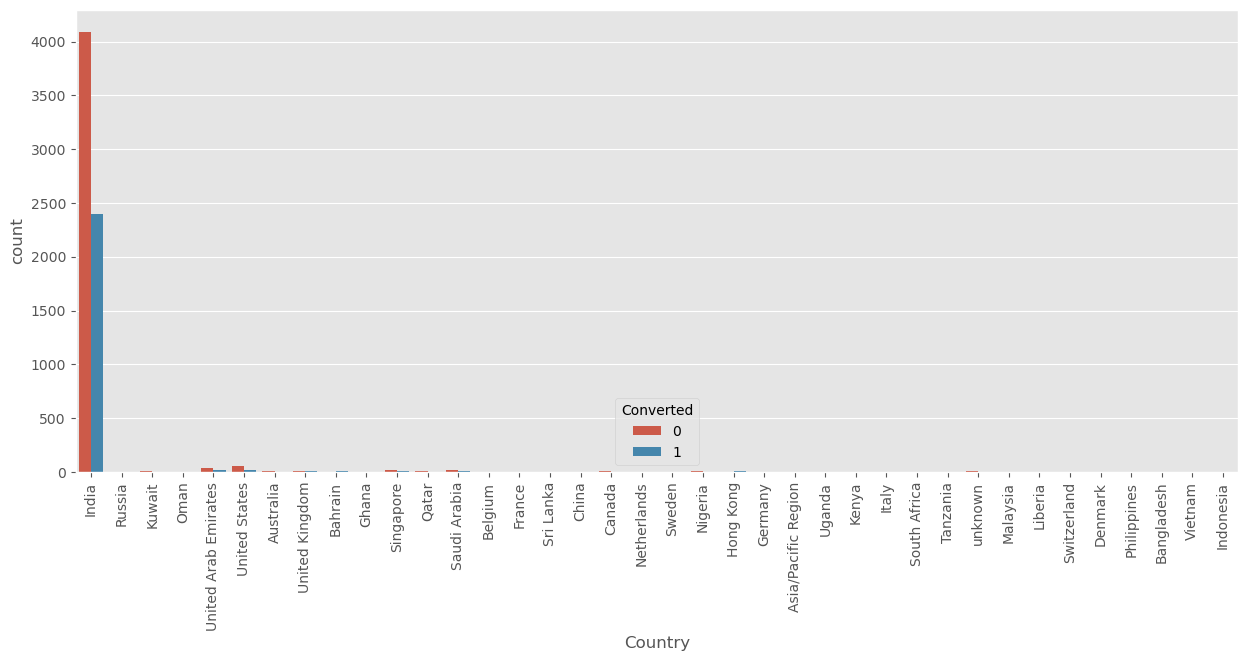

In [979]:
#plotting Country columnn 

plt.figure(figsize=(15,6))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [980]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

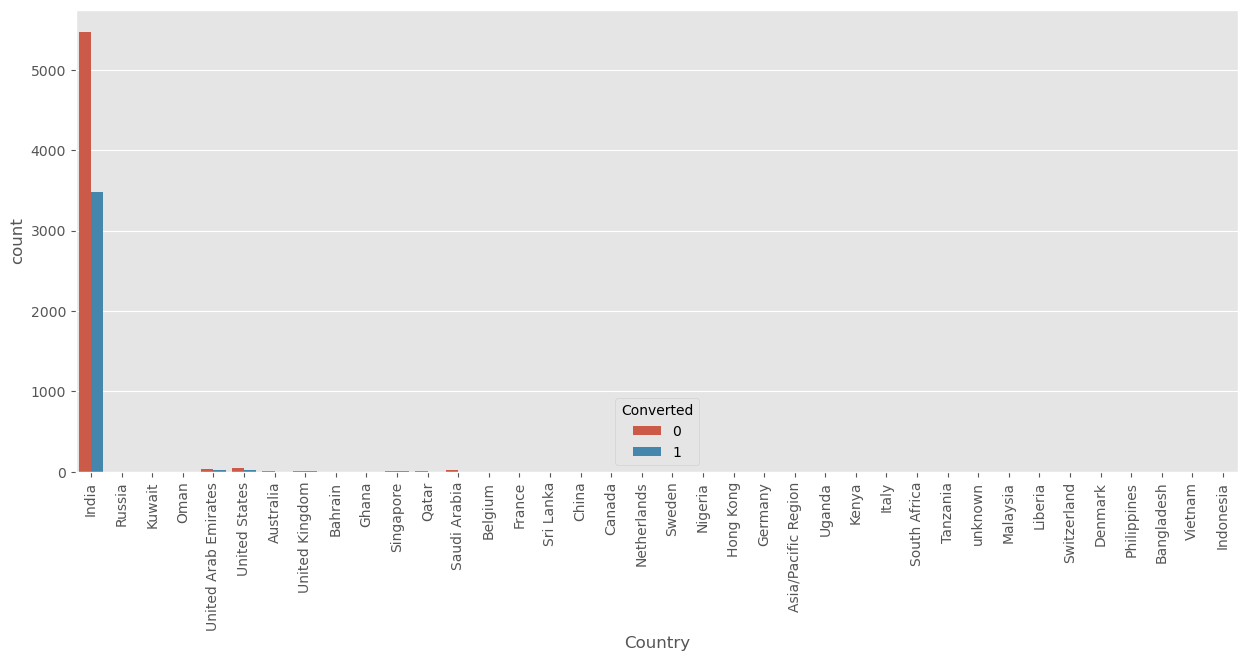

In [981]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,6))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [982]:
#As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped


df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


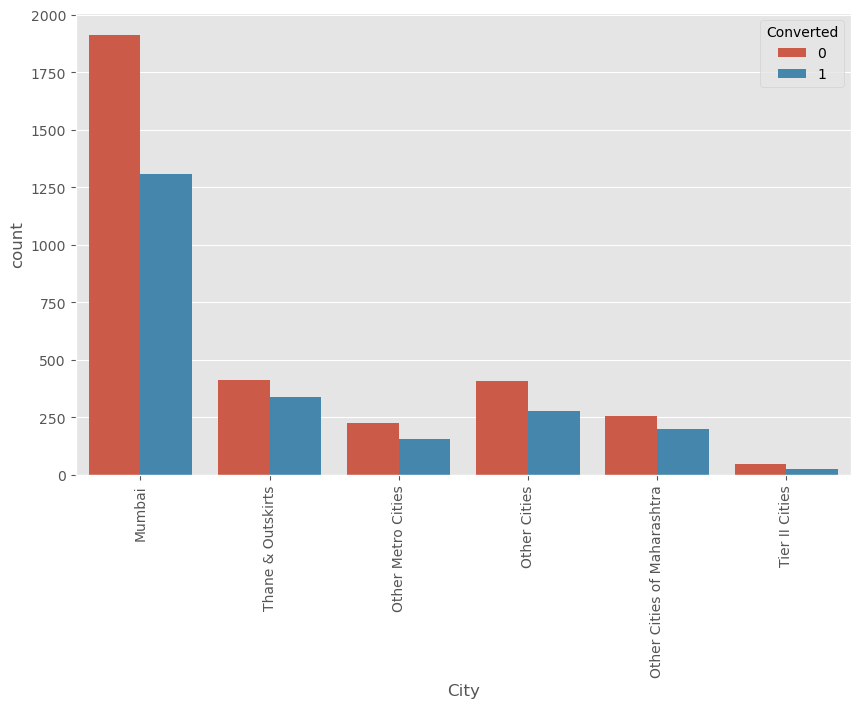

In [983]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,6))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [984]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [985]:
# Many don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

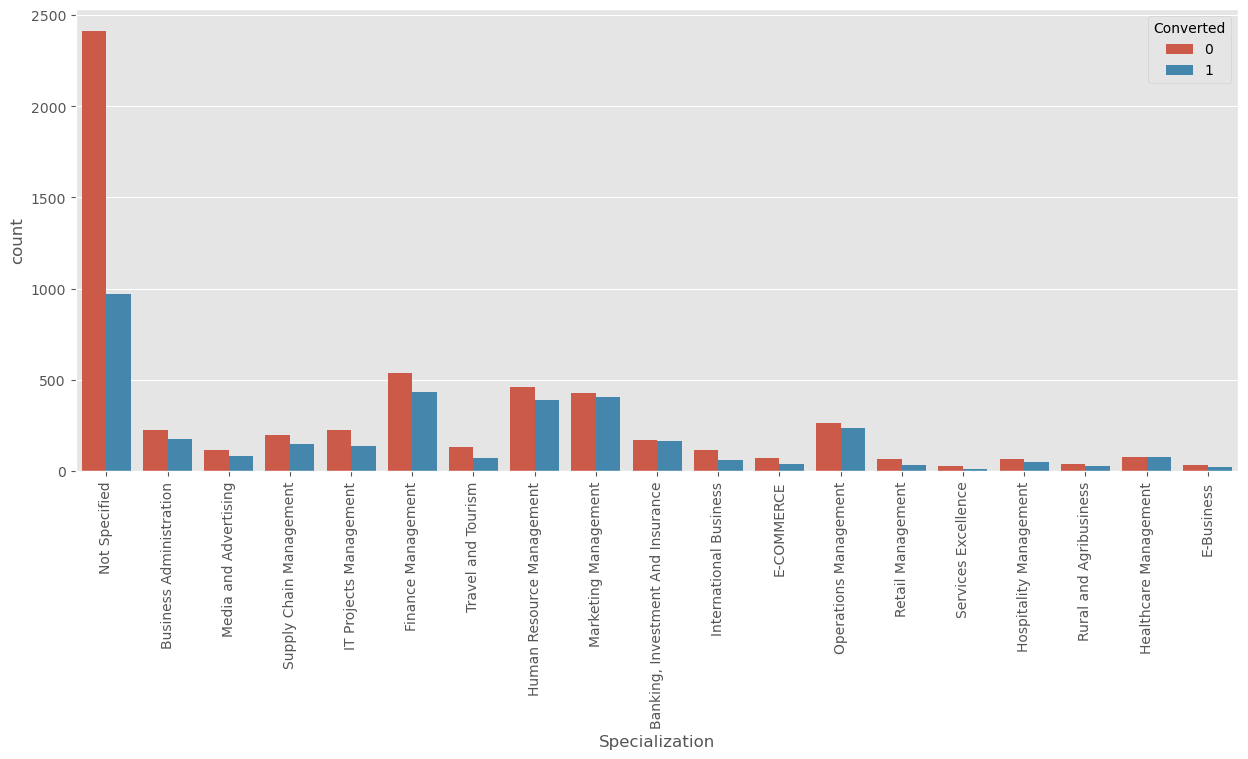

In [986]:
#plotting Specialization columnn 

plt.figure(figsize=(15,6))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [987]:
#combining Management Specializations because they show similar trends and plotting the changes made

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management Specializations') 


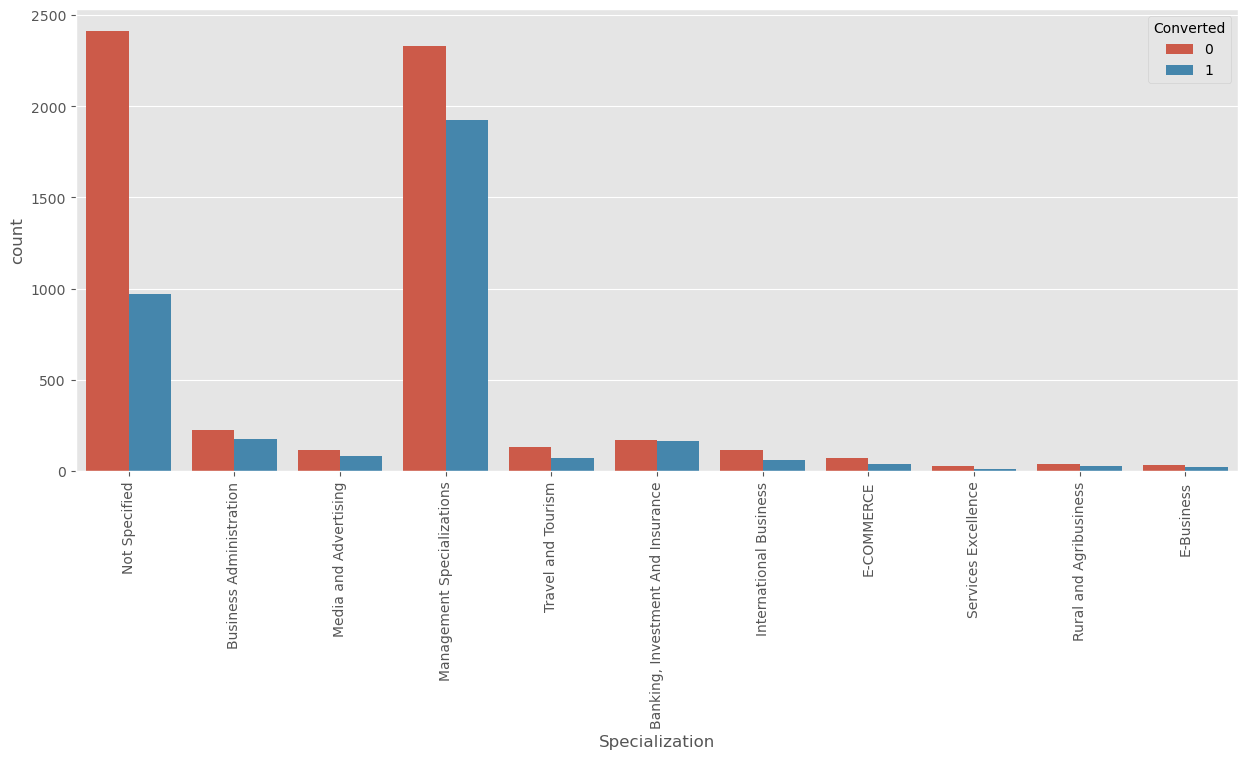

In [988]:

plt.figure(figsize=(15,6))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [989]:
# Value counts of What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [990]:
#imputing Nan values with "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [991]:
#checking count of values

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [992]:
#checking value counts

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [993]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [994]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


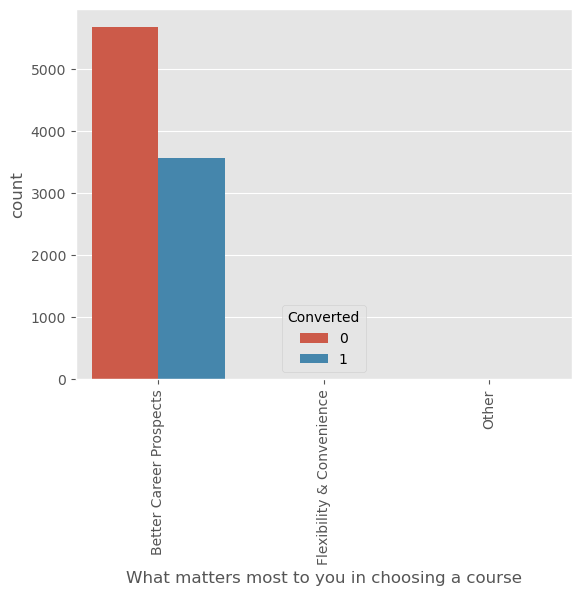

In [995]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [996]:
#checking value counts of variable

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [997]:
#checking value counts of Tag variable

df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

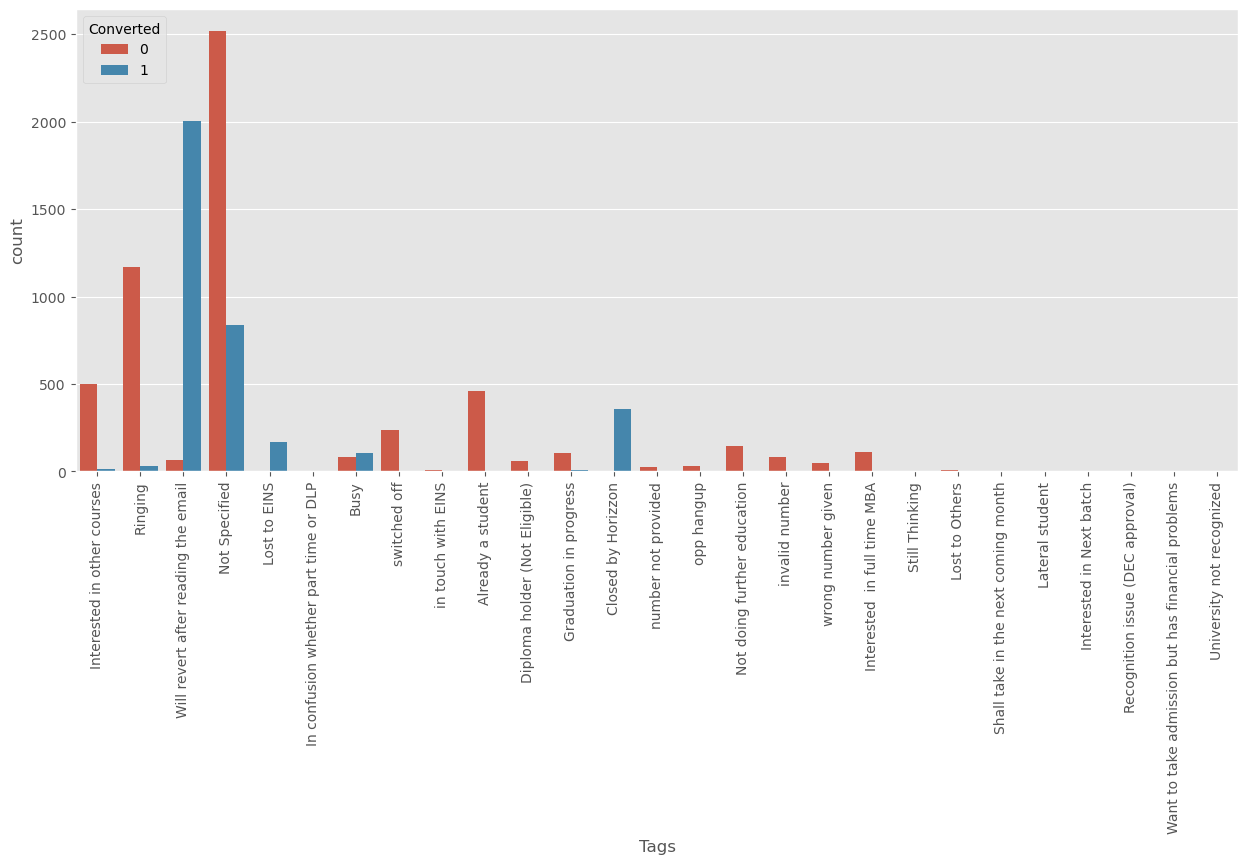

In [998]:
#replacing Nan values with "Not Specified" and visualize

df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

plt.figure(figsize=(15,6))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [999]:
#replacing tags with low frequency with "Other Tags"

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [1000]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [1001]:
#checking percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1002]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1003]:
#replacing Nan Values and combining low frequency values
#We can group some of the lower frequency occuring labels under a common label 'Others'

df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

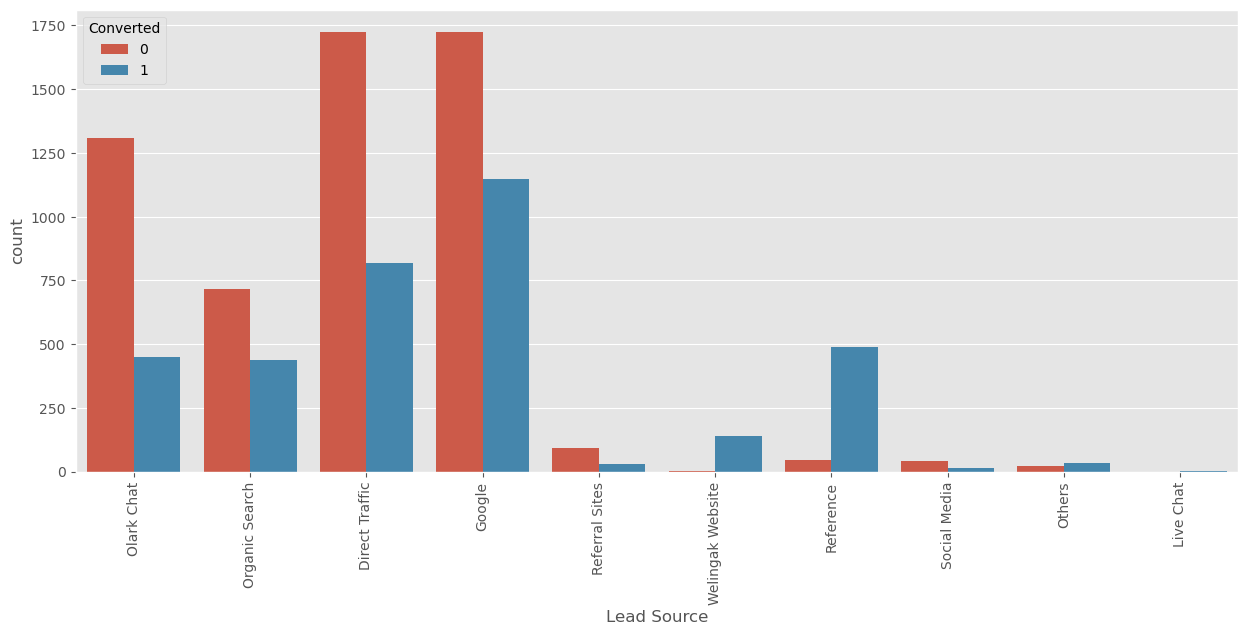

In [1004]:
plt.figure(figsize=(15,6))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1005]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1006]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [1007]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [1008]:
#Check the Null Values in All Columns in percentage:

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1009]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model.

df = df.dropna()

In [1010]:
#Checking percentage of Null Values in All Columns:

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

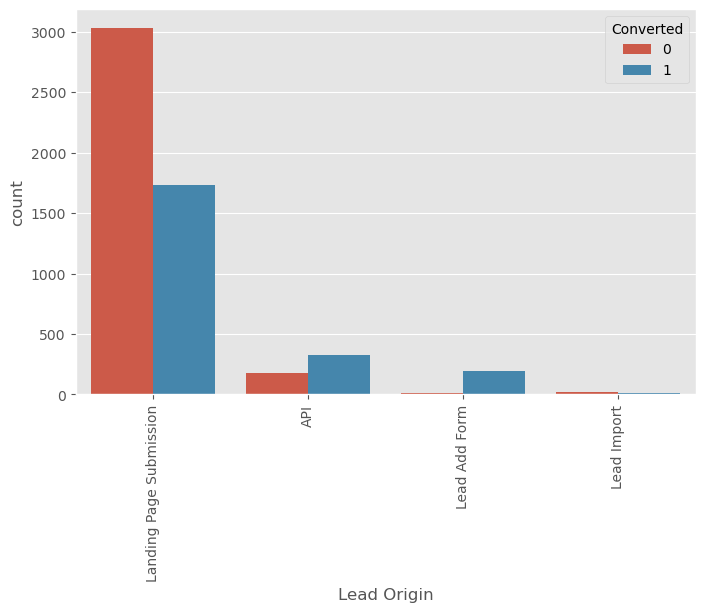

In [1011]:
#Lead Origin value counts and plot

df['Lead Origin'].value_counts(dropna=False)
plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


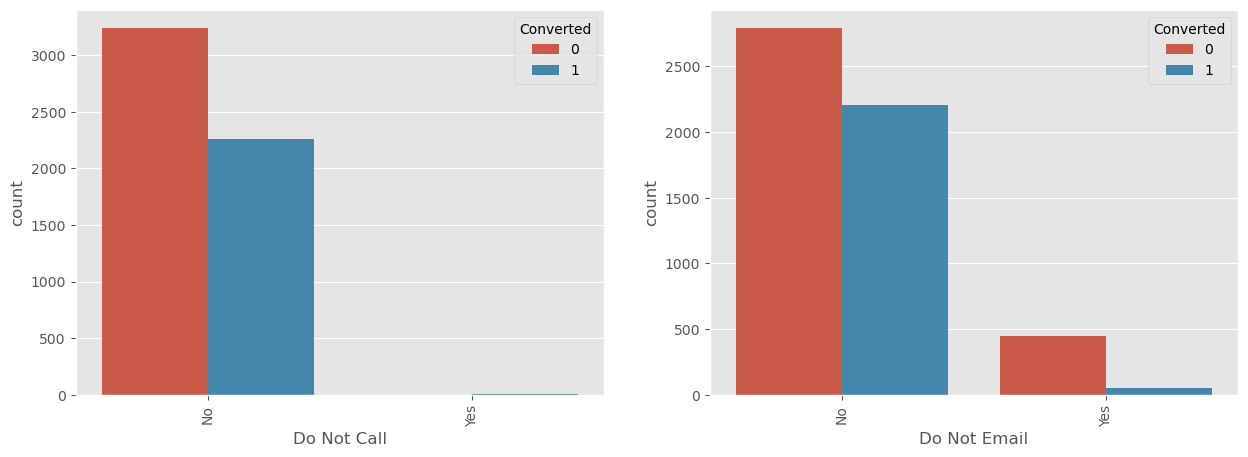

In [1012]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [1013]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     5501
Yes       2
Name: Do Not Call, dtype: int64

In [1014]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     4999
Yes     504
Name: Do Not Email, dtype: int64

In [1015]:
df.Search.value_counts(dropna=False)

No     5497
Yes       6
Name: Search, dtype: int64

In [1016]:
df.Magazine.value_counts(dropna=False)

No    5503
Name: Magazine, dtype: int64

In [1017]:
df['Newspaper Article'].value_counts(dropna=False)

No     5502
Yes       1
Name: Newspaper Article, dtype: int64

In [1018]:
df['X Education Forums'].value_counts(dropna=False)

No     5502
Yes       1
Name: X Education Forums, dtype: int64

In [1019]:
df['Newspaper'].value_counts(dropna=False)

No    5503
Name: Newspaper, dtype: int64

In [1020]:
df['Digital Advertisement'].value_counts(dropna=False)

No     5502
Yes       1
Name: Digital Advertisement, dtype: int64

In [1021]:
df['Through Recommendations'].value_counts(dropna=False)

No     5497
Yes       6
Name: Through Recommendations, dtype: int64

In [1022]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    5503
Name: Receive More Updates About Our Courses, dtype: int64

In [1023]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    5503
Name: Update me on Supply Chain Content, dtype: int64

In [1024]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    5503
Name: Get updates on DM Content, dtype: int64

In [1025]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    5503
Name: I agree to pay the amount through cheque, dtype: int64

In [1026]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

Yes    2884
No     2619
Name: A free copy of Mastering The Interview, dtype: int64

In [1027]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Email Opened                    1942
Modified                        1734
SMS Sent                        1368
Page Visited on Website          229
Email Link Clicked                89
Olark Chat Conversation           36
Unsubscribed                      33
Email Bounced                     31
Unreachable                       24
Had a Phone Conversation          12
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [1028]:
 #clubbing the lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                        'Email Received'],'Other_Notable_activity')

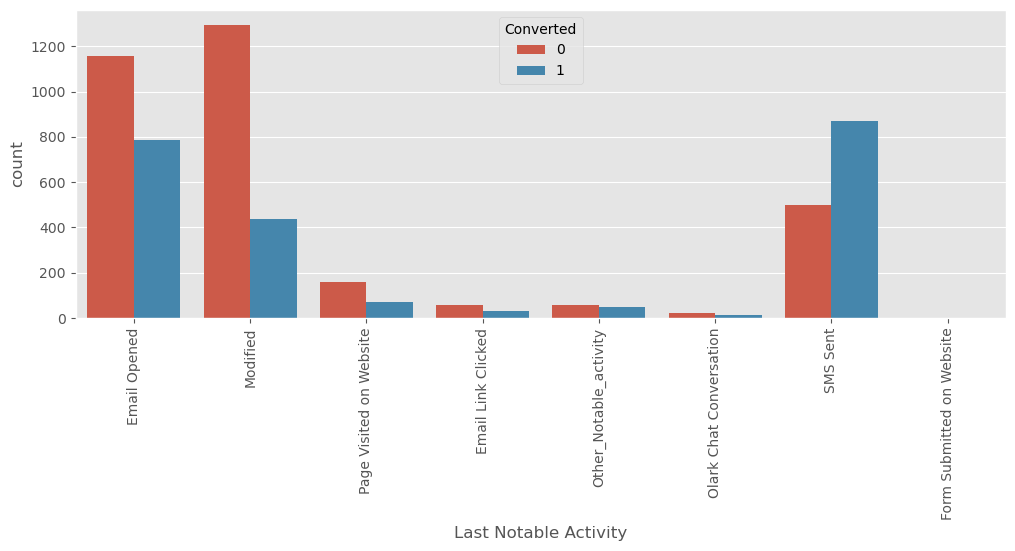

In [1029]:
#visualizing

plt.figure(figsize = (12,4))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [1030]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

Email Opened                 1942
Modified                     1734
SMS Sent                     1368
Page Visited on Website       229
Other_Notable_activity        104
Email Link Clicked             89
Olark Chat Conversation        36
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [1031]:
#Dropping Columns:

df = df.drop(['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque'],1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5503 non-null   object 
 1   Lead Source                             5503 non-null   object 
 2   Do Not Email                            5503 non-null   object 
 3   Converted                               5503 non-null   int64  
 4   TotalVisits                             5503 non-null   float64
 5   Total Time Spent on Website             5503 non-null   int64  
 6   Page Views Per Visit                    5503 non-null   float64
 7   Last Activity                           5503 non-null   object 
 8   Specialization                          5503 non-null   object 
 9   What is your current occupation         5503 non-null   object 
 10  Tags                                    5503 non-null   obje

In [1032]:
#Seeing for the % of converted columns value=1

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

41.06850808649828

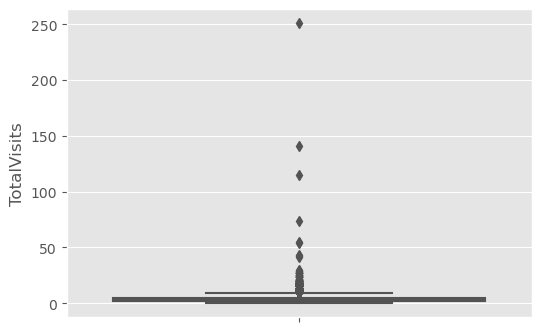

In [1033]:
#visualizing spread of variable 'TotalVisits'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [1034]:
#We see outliers in the above graph
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5503.000000
mean        4.560967
std         5.567818
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

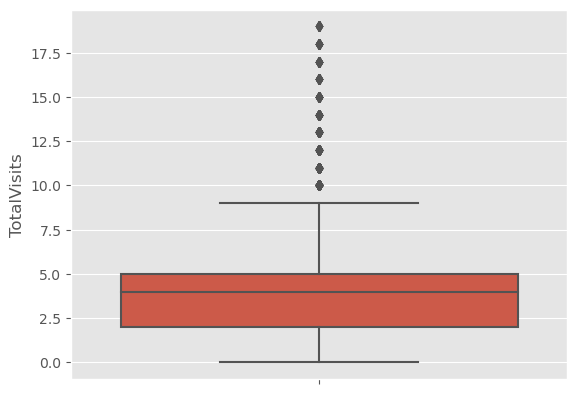

In [1035]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values.

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [1036]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5451.000000
mean      613.921849
std       549.769995
min         0.000000
5%          0.000000
25%       148.000000
50%       381.000000
75%      1089.000000
90%      1449.000000
95%      1613.000000
99%      1858.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

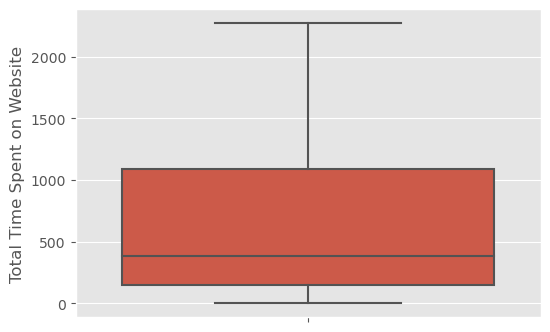

In [1037]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

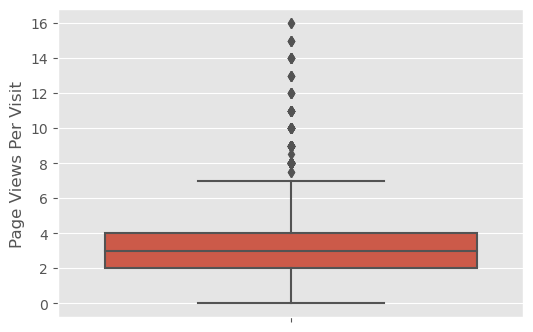

In [1038]:
#visualizing spread of 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

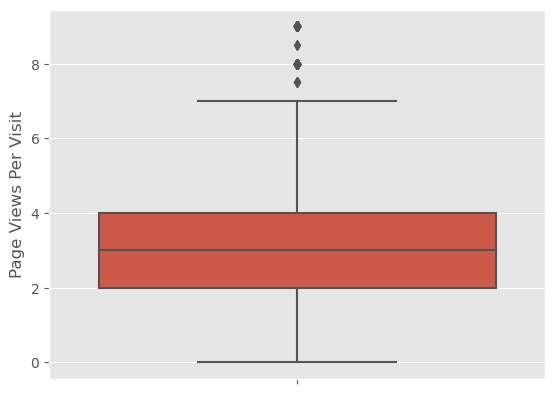

In [1039]:
#Outlier treatment

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

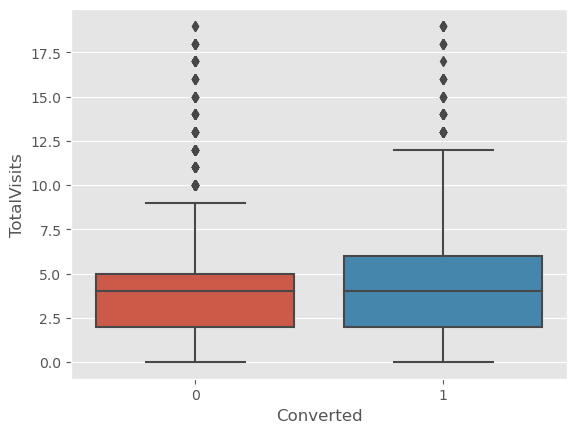

In [1040]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Since the median for converted and not converted are the same , no major conclusion can be drawn.

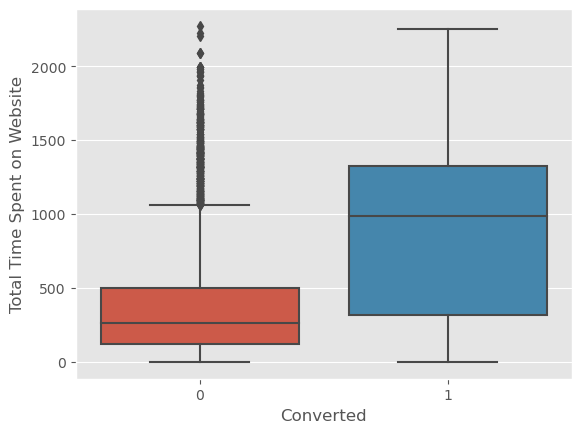

In [1041]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

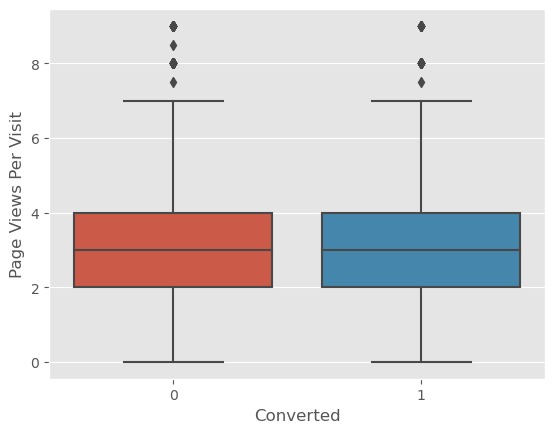

In [1042]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [1043]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)



Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [1044]:
#DUMMY VARIABLE CREATION.
#displaying the categorical columns.

categorical_cols= df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1045]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1046]:
# List of variables to map


import pandas as pd
encoded_data = pd.get_dummies(df)
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [1047]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [1048]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 477 to 6775
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           3777 non-null   float64
 1   Total Time Spent on Website                           3777 non-null   float64
 2   Page Views Per Visit                                  3777 non-null   float64
 3   Lead Origin_Landing Page Submission                   3777 non-null   uint8  
 4   Lead Origin_Lead Add Form                             3777 non-null   uint8  
 5   Lead Origin_Lead Import                               3777 non-null   uint8  
 6   What is your current occupation_Housewife             3777 non-null   uint8  
 7   What is your current occupation_Other                 3777 non-null   uint8  
 8   What is your current occupation_Student               37

In [1049]:
from sklearn.model_selection import train_test_split


# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [1050]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 477 to 6775
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           3777 non-null   float64
 1   Total Time Spent on Website                           3777 non-null   int64  
 2   Page Views Per Visit                                  3777 non-null   float64
 3   Lead Origin_Landing Page Submission                   3777 non-null   uint8  
 4   Lead Origin_Lead Add Form                             3777 non-null   uint8  
 5   Lead Origin_Lead Import                               3777 non-null   uint8  
 6   What is your current occupation_Housewife             3777 non-null   uint8  
 7   What is your current occupation_Other                 3777 non-null   uint8  
 8   What is your current occupation_Student               37

In [1051]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
477,-0.423174,-0.728638,-0.003088,1,0,0,0,0,0,1,0,0,0,0,1,0
7373,0.262509,-0.763065,1.182683,1,0,0,0,0,0,1,0,1,0,0,0,0
825,-0.423174,-0.630793,-0.003088,1,0,0,0,0,0,1,0,0,0,0,0,0
3658,0.605351,-1.054786,1.775568,1,0,0,0,0,0,1,0,1,0,0,0,0
6496,-0.766016,0.159210,-0.595973,1,0,0,0,0,0,1,0,0,0,0,0,0


In [1052]:
# Checking the Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

41.02279043913285

In [1053]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)  # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1054]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True])

In [1055]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', True, 1),
 ('City_Thane & Outskirts', False, 2),
 ('City_Tier II Cities', True, 1)]

In [1056]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Tier II Cities'],
      dtype='object')

In [1057]:
X_train.columns[~rfe.support_]

Index(['City_Thane & Outskirts'], dtype='object')

In [1058]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3777
Model:                            GLM   Df Residuals:                     3761
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.4
Date:                Wed, 03 May 2023   Deviance:                       3624.7
Time:                        20:29:55   Pearson chi2:                 3.78e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3259
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1220      1.421      0.790      0.430      -1.663       3.907
TotalVisits                                              0.1312      0.047      2.796      0.005       0.039       0.223
Total Time Spent on Website                              1.0893      0.044     24.827      0.000       1.003       1.175
Page Views Per Visit                                    -0.0515      0.050     -1.033      0.301      -0.149       0.046
Lead Origin_Landing Page Submission                     -1.4511      0.145     -9.993      0.000      -1.736      -1.166
Lead Origin_Lead Add Form                                4.6384      0.730      6.351      0.000       3.207       6.070
Lead Origin_Lead Import                                 -0.5637      0.618     -0.912      0.362      -1.775       0.648
What is your current occupation_Housewife               21.7092   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
What is your current occupation_Other                   22.2948   1.73e+04      0.001      0.999   -3.38e+04    3.39e+04
What is your current occupation_Student                 -0.0912      1.442     -0.063      0.950      -2.917       2.734
What is your current occupation_Unemployed              -0.6277      1.421     -0.442      0.659      -3.412       2.157
What is your current occupation_Working Professional     2.4099      1.438      1.676      0.094      -0.408       5.228
City_Other Cities                                        0.0949      0.125      0.757      0.449      -0.151       0.341
City_Other Cities of Maharashtra                         0.2524      0.148      1.709      0.088      -0.037       0.542
City_Other Metro Cities                                  0.1507      0.160      0.939      0.348      -0.164       0.465
City_Tier II Cities                                     -0.4509      0.382     -1.181      0.238      -1.199       0.297
========================================================================================================================
"""

In [1059]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)
col = col.drop('What is your current occupation_Other',1)
col = col.drop('What is your current occupation_Student',1)
col = col.drop('What is your current occupation_Unemployed',1)


In [1060]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3777
Model:                            GLM   Df Residuals:                     3765
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1823.8
Date:                Wed, 03 May 2023   Deviance:                       3647.6
Time:                        20:29:56   Pearson chi2:                 3.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3218
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5241      0.138      3.798      0.000       0.254       0.795
TotalVisits                                              0.1344      0.046      2.892      0.004       0.043       0.225
Total Time Spent on Website                              1.0865      0.044     24.852      0.000       1.001       1.172
Page Views Per Visit                                    -0.0569      0.050     -1.149      0.250      -0.154       0.040
Lead Origin_Landing Page Submission                     -1.4545      0.145    -10.062      0.000      -1.738      -1.171
Lead Origin_Lead Add Form                                4.6431      0.730      6.360      0.000       3.212       6.074
Lead Origin_Lead Import                                 -0.5954      0.617     -0.965      0.335      -1.805       0.614
What is your current occupation_Working Professional     3.0123      0.228     13.200      0.000       2.565       3.460
City_Other Cities                                        0.0935      0.125      0.748      0.454      -0.151       0.338
City_Other Cities of Maharashtra                         0.2424      0.148      1.642      0.101      -0.047       0.532
City_Other Metro Cities                                  0.1548      0.160      0.969      0.332      -0.158       0.468
City_Tier II Cities                                     -0.4748      0.381     -1.245      0.213      -1.222       0.273
========================================================================================================================
"""

In [1061]:
col = col.drop('Page Views Per Visit',1)
col = col.drop('Lead Origin_Lead Import',1)
col = col.drop('City_Other Cities',1)
col = col.drop('City_Other Cities of Maharashtra',1)
col = col.drop('City_Other Metro Cities',1)
col = col.drop('City_Tier II Cities',1)

In [1062]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3777
Model:                            GLM   Df Residuals:                     3771
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1827.5
Date:                Wed, 03 May 2023   Deviance:                       3654.9
Time:                        20:29:57   Pearson chi2:                 3.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3204
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5626      0.130      4.319      0.000       0.307       0.818
TotalVisits                                              0.1105      0.041      2.710      0.007       0.031       0.190
Total Time Spent on Website                              1.0839      0.043     24.923      0.000       0.999       1.169
Lead Origin_Landing Page Submission                     -1.4598      0.139    -10.523      0.000      -1.732      -1.188
Lead Origin_Lead Add Form                                4.6961      0.728      6.449      0.000       3.269       6.123
What is your current occupation_Working Professional     3.0052      0.228     13.191      0.000       2.559       3.452
========================================================================================================================
"""

In [1063]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1064]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Working Profes...,1.09
3,Lead Origin_Lead Add Form,1.08
0,TotalVisits,1.07
2,Lead Origin_Landing Page Submission,1.07
1,Total Time Spent on Website,1.05


In [1065]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

477     0.150116
7373    0.155087
825     0.164154
3658    0.122007
6496    0.308050
8394    0.598611
8363    0.681457
8151    0.104275
6554    0.500393
394     0.163965
dtype: float64

In [1066]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15011597, 0.15508682, 0.16415385, 0.12200701, 0.30804964,
       0.59861113, 0.6814573 , 0.10427466, 0.50039289, 0.16396496])

In [1067]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.150116,477
1,0,0.155087,7373
2,0,0.164154,825
3,0,0.122007,3658
4,1,0.308050,6496


In [1068]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.150116,477,0
1,0,0.155087,7373,0
2,0,0.164154,825,0
3,0,0.122007,3658,0
4,1,0.308050,6496,0


In [1069]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1873  354]
 [ 534 1016]]


In [1070]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7648927720413026


In [1071]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1072]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.655483870967742

In [1073]:
#specificity
TN / float(TN+FP)

0.8410417602155366

In [1074]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.1589582397844634


In [1075]:
# positive predictive value is
print (TP / float(TP+FP))

0.7416058394160584


In [1076]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7781470710427919


In [1077]:
#PLOTTING ROC CURVE

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

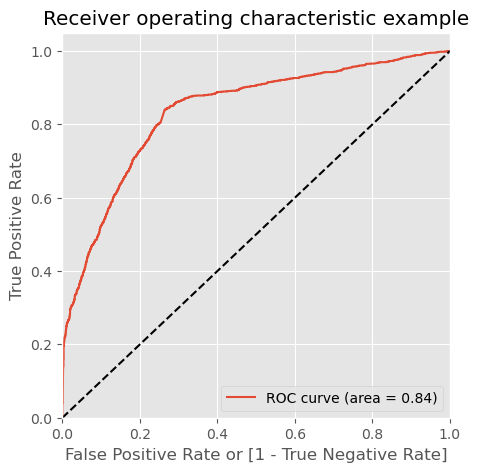

In [1078]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [1079]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.150116,477,0,1,1,0,0,0,0,0,0,0,0
1,0,0.155087,7373,0,1,1,0,0,0,0,0,0,0,0
2,0,0.164154,825,0,1,1,0,0,0,0,0,0,0,0
3,0,0.122007,3658,0,1,1,0,0,0,0,0,0,0,0
4,1,0.308050,6496,0,1,1,1,1,0,0,0,0,0,0


In [1080]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.410379  1.000000  0.000000
0.1   0.1  0.411438  1.000000  0.001796
0.2   0.2  0.716442  0.888387  0.596767
0.3   0.3  0.777866  0.841935  0.733273
0.4   0.4  0.770188  0.745806  0.787158
0.5   0.5  0.764893  0.655484  0.841042
0.6   0.6  0.747154  0.538065  0.892681
0.7   0.7  0.725973  0.418710  0.939829
0.8   0.8  0.701086  0.305806  0.976201
0.9   0.9  0.675933  0.221290  0.992366


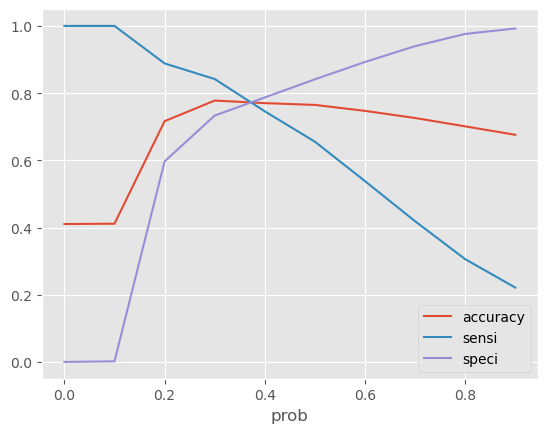

In [1081]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1082]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.150116,477,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.155087,7373,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.164154,825,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.122007,3658,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.308050,6496,0,1,1,1,1,0,0,0,0,0,0,1


In [1083]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.150116,477,0,15
1,0,0.155087,7373,0,16
2,0,0.164154,825,0,16
3,0,0.122007,3658,0,12
4,1,0.308050,6496,1,31


In [1084]:
#overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7778660312417263

In [1085]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1633,  594],
       [ 245, 1305]], dtype=int64)

In [1086]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1087]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8419354838709677

In [1088]:
#specificity
TN / float(TN+FP)

0.7332734620565784

In [1089]:
#False Postive Rate
print(FP/ float(TN+FP))

0.26672653794342166


In [1090]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6872037914691943


In [1091]:
# Negative predictive value
print (TN / float(TN+ FN))

0.869542066027689


In [1092]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1633,  594],
       [ 245, 1305]], dtype=int64)

In [1093]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6872037914691943

In [1094]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8419354838709677

In [1095]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6872037914691943

In [1096]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8419354838709677

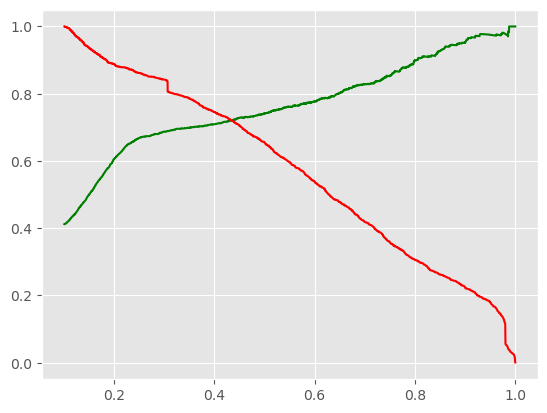

In [1097]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [1098]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
582,-0.381608,1.021288,-0.018732,0,0,0,0,0,0,1,0,0,0,0,1,0
6504,-0.726781,-0.070391,-0.580479,1,0,0,0,0,0,1,0,0,0,0,0,0
3683,-0.036435,0.361503,0.543015,1,0,0,0,0,0,1,0,1,0,0,0,0
5294,-0.036435,-0.899258,0.543015,1,0,0,0,0,0,1,0,0,0,0,0,0
7307,-0.381608,-0.395689,-0.018732,1,0,0,0,0,0,1,0,0,0,0,1,0


In [1099]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional
582,-0.381608,1.021288,0,0,0
6504,-0.726781,-0.070391,1,0,0
3683,-0.036435,0.361503,1,0,0
5294,-0.036435,-0.899258,1,0,0
7307,-0.381608,-0.395689,1,0,0


In [1100]:
X_test_sm = sm.add_constant(X_test)

In [1101]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

582     0.835816
6504    0.258500
3683    0.375337
5294    0.132861
7307    0.202907
7767    0.484858
834     0.564448
6069    0.162779
1502    0.714058
7097    0.224604
dtype: float64

In [1102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1103]:
y_pred_1.head()

,0
582,0.835816
6504,0.258500
3683,0.375337
5294,0.132861
7307,0.202907


In [1104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1105]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1108]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,582,0.835816
1,0,6504,0.258500
2,0,3683,0.375337
3,0,5294,0.132861
4,1,7307,0.202907


In [1109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1110]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,582,0.835816
1,0,6504,0.258500
2,0,3683,0.375337
3,0,5294,0.132861
4,1,7307,0.202907


In [1111]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,582,1,0.835816,84
1,6504,0,0.258500,26
2,3683,0,0.375337,38
3,5294,0,0.132861,13
4,7307,1,0.202907,20


In [1113]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1114]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,582,1,0.835816,84,1
1,6504,0,0.258500,26,0
2,3683,0,0.375337,38,1
3,5294,0,0.132861,13,0
4,7307,1,0.202907,20,0


In [1115]:
#overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7709876543209877

In [1116]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[693, 263],
       [108, 556]], dtype=int64)

In [1117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1118]:
#sensitivity
TP / float(TP+FN)

0.8373493975903614

In [1119]:
#specificity
TN / float(TN+FP)

0.7248953974895398

In [1120]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6788766788766789

In [1121]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8373493975903614

In [ ]:
THE MODEL PREDICTS THE CONVERSION RATE WELL.